### Train VAE Models:
* The following notebook enables the training of variational auto encoder models with a user specified latent dimension.

#### For Colab:

In [ ]:
!git clone https://github.com/jhell1717/latentoptim.git
!pip install git+https://github.com/jhell1717/latentoptim.git

#### Imports:

In [1]:
import os
import pandas as pd
import numpy as np
import torch
import pickle

import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.decomposition import PCA

import vae
import data
import utils

# Use LaTeX-style formatting
plt.rcParams.update({
    "figure.figsize": (3, 2),  # Width, Height in inches
    "figure.dpi": 500,
    "font.family": "serif",
    "font.size": 6,
    "axes.linewidth": 1.5,
    "xtick.direction": "in",
    "ytick.direction": "in"
})

### Creates Random Shape Dataset
* A python package called ```data``` inside ```latentoptim/``` is created enabling users to generate random geometric shapes from a specified list of shape categories including circle, triangle, squares, rectangles, stars, pentagons, circles and diamonds.
* User can use ```data.Generator``` object to specify a population of shapes with defined resolution and population number.
* The ```generate_shapes()``` method is used to create the shape population.

#### Local:

In [2]:
# Creates shape random shape data.
shape_data = data.Generator(resolution=200,num_shapes=500000).generate_shapes()

file_path = os.path.join(r'/Users/joshuahellewell/Desktop/02-msc/01-modules/MSc Project - 771952/03-results/data','demo_shapes.pkl'),

# Save shape population as .pkl
with open(file_path[0], "wb") as f:
    pickle.dump(shape_data, f)

100%|██████████| 500000/500000 [00:33<00:00, 14946.76it/s]


### Training Models
* VAE models can be automatically trained using a range of hyperparamaters by reading from a .csv file. Below is an example of specifying the neural network training setup for a single model with a ```batch_size=512```, ```activation='relu'``` and learning rate, ```lr=0.001```.


In [3]:
df = pd.read_csv(r'/Users/joshuahellewell/Desktop/02-msc/01-modules/MSc Project - 771952/03-results/models/test_matrix.csv')
df.head(10)

,model_name,data,latent_dim,batch_size,activation,lr
0,model_001,/Users/joshuahellewell/Desktop/02-msc/01-modul...,8,512,relu,0.001


**Shape Data**
* To ensure consistency across models, the same shape dataset is used.
* 100k shapes are used for training.
* A variable ```shape``` is used to define the list of shape objects specified by the ```data.Generator``` class. 

In [9]:
# Load shape .pkl file and store as list with variable name 'shapes'
with open('/Users/joshuahellewell/Desktop/02-msc/01-modules/MSc Project - 771952/03-results/data/shapes100k.pkl', 'rb') as f:
        shapes = pickle.load(f) 

### Train Models:
* Using the defined training matrix, defined by the ```df``` DataFrame, the code will iterate through the rows of the matrix and create and train ths specified model.
* The user can specify the number of epochs by changing ```epochs``` value.
* The user can specify the frequency to save the model by changing ```checkpoint_intervals```.
* The following loop will save the model in the specified location, and at the specified checkpoint intervals.
* A training log will also be created.


In [6]:
for i,j in df.iterrows():
    with open(j['data'], 'rb') as f: # Load shape .pkl file and store as list with variable name 'shapes'
        shapes = pickle.load(f)

    dataset = vae.ShapeData(shapes) # Create dataset object

    model = vae.VAE(200*2,j['latent_dim']) # Create model object

    # Initialises model trainer.
    trainer = vae.Trainer(dataset,model,base_dir=r'/Users/joshuahellewell/Desktop/02-msc/01-modules/MSc Project - 771952/03-results/demo_models',trained_data=j['data'],model_name=j['model_name'],batch_size=j['batch_size'])
    
    # Train model
    trainer.train_model(epochs=100,checkpoint_interval=200)

Epoch 1, Loss: 7212.336297512054
Epoch 2, Loss: 3570.805245399475
Epoch 3, Loss: 3136.908489704132
Epoch 4, Loss: 2940.9026250839233
Epoch 5, Loss: 2814.958996772766
Epoch 6, Loss: 2486.68816614151
Epoch 7, Loss: 2415.608794927597
Epoch 8, Loss: 2229.8621871471405
Epoch 9, Loss: 2166.3179540634155
Epoch 10, Loss: 2240.2070207595825
Epoch 11, Loss: 2051.0220646858215
Epoch 12, Loss: 1978.78435754776
Epoch 13, Loss: 1865.8453402519226
Epoch 14, Loss: 1947.526421546936
Epoch 15, Loss: 1801.8289177417755
Epoch 16, Loss: 1722.1559517383575
Epoch 17, Loss: 1807.8239305019379
Epoch 18, Loss: 1761.136756181717
Epoch 19, Loss: 1814.6691040992737
Epoch 20, Loss: 1778.2827093601227
Epoch 21, Loss: 1745.6163096427917
Epoch 22, Loss: 1775.3056671619415
Epoch 23, Loss: 1818.5679066181183
Epoch 24, Loss: 1863.6025693416595
Epoch 25, Loss: 1734.6647675037384
Epoch 26, Loss: 1680.1142790317535
Epoch 27, Loss: 1755.6936874389648
Epoch 28, Loss: 1602.2350630760193
Epoch 29, Loss: 1777.091044664383
Epoch 

### Load Trained Models:
* In case the user has already trained and saved VAE models, the following demonstrates loading the models.
* The variable ```models``` specifies a list of all models.
* The user can specify the corresponding number of latent dimensions for each of the loaded models in ```
latent_dims```

In [3]:
model1 = torch.load(r'/Users/joshuahellewell/Desktop/02-msc/01-modules/MSc Project - 771952/03-results/models/06052025_training/model_001/vae_epoch_1000_mse1145.3.pt')
model2 = torch.load(r'/Users/joshuahellewell/Desktop/02-msc/01-modules/MSc Project - 771952/03-results/models/06052025_training/model_002/vae_epoch_1000_mse1015.6.pt')
model3 = torch.load(r'/Users/joshuahellewell/Desktop/02-msc/01-modules/MSc Project - 771952/03-results/models/06052025_training/model_003/vae_epoch_1000_mse1030.7.pt')
model4 = torch.load(r'/Users/joshuahellewell/Desktop/02-msc/01-modules/MSc Project - 771952/03-results/models/06052025_training/model_004/vae_epoch_1000_mse1207.0.pt')
model5 = torch.load(r'/Users/joshuahellewell/Desktop/02-msc/01-modules/MSc Project - 771952/03-results/models/06052025_training/model_005/vae_epoch_1000_mse1215.2.pt')

models = [model1,model2,model3,model4,model5]
latent_dims = [2,3,4,5,6]

/var/folders/g6/cp4y9yrj70746qd9t6j1yj2r0000gn/T/ipykernel_67533/2498040098.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(r'/Users/joshuahellewell/

In [5]:
plot_all_latent_combinations(models,latent_dims,vae_metrics=vae.Metrics,shapes_path=r'/Users/joshuahellewell/Desktop/02-msc/01-modules/MSc Project - 771952/03-results/data/shapes100k.pkl')


 Plotting for latent dimension: 2D
  ➤ Generating KDE plot...
  ➤ Saving: varying_z1_z2_fixed_.png

 Plotting for latent dimension: 3D
  ➤ Generating KDE plot...
  ➤ Saving: varying_z1_z2_fixed_z3=1.0.png
  ➤ Saving: varying_z1_z3_fixed_z2=1.0.png
  ➤ Saving: varying_z2_z3_fixed_z1=1.0.png

 Plotting for latent dimension: 4D
  ➤ Generating KDE plot...
  ➤ Saving: varying_z1_z2_fixed_z3=1.0_z4=1.0.png
  ➤ Saving: varying_z1_z3_fixed_z2=1.0_z4=1.0.png
  ➤ Saving: varying_z1_z4_fixed_z2=1.0_z3=1.0.png
  ➤ Saving: varying_z2_z3_fixed_z1=1.0_z4=1.0.png
  ➤ Saving: varying_z2_z4_fixed_z1=1.0_z3=1.0.png
  ➤ Saving: varying_z3_z4_fixed_z1=1.0_z2=1.0.png

 Plotting for latent dimension: 5D
  ➤ Generating KDE plot...
  ➤ Saving: varying_z1_z2_fixed_z3=1.0_z4=1.0_z5=1.0.png
  ➤ Saving: varying_z1_z3_fixed_z2=1.0_z4=1.0_z5=1.0.png
  ➤ Saving: varying_z1_z4_fixed_z2=1.0_z3=1.0_z5=1.0.png
  ➤ Saving: varying_z1_z5_fixed_z2=1.0_z3=1.0_z4=1.0.png
  ➤ Saving: varying_z2_z3_fixed_z1=1.0_z4=1.0_z5=1.0.p

### PCA Comparison
* The employed VAE model is a generative model that results in a smooth and continuous latent space.
* The inclusion of the KL divergence encourages generated shapes to similarly reflect the shape categories included in the original training dataset.
* We demonstrate the equivalent workflow of encoding the shape dataset with a linear dimensionality reduction technique, PCA. The PCA technique is deterministic.

In [39]:
sh = np.array([i.points.flatten() for i in shapes]) # Create array from Shape objects.

In [40]:
pca = PCA(2)   # Initialise 2 component PCA. 
pca_z = pca.fit_transform(sh)   # Fit PCA to the shape dataset. 

PC1 range: -7.021608596571177, 7.303261697453861
PC2 range: -5.641442163645352, 4.338708844690676


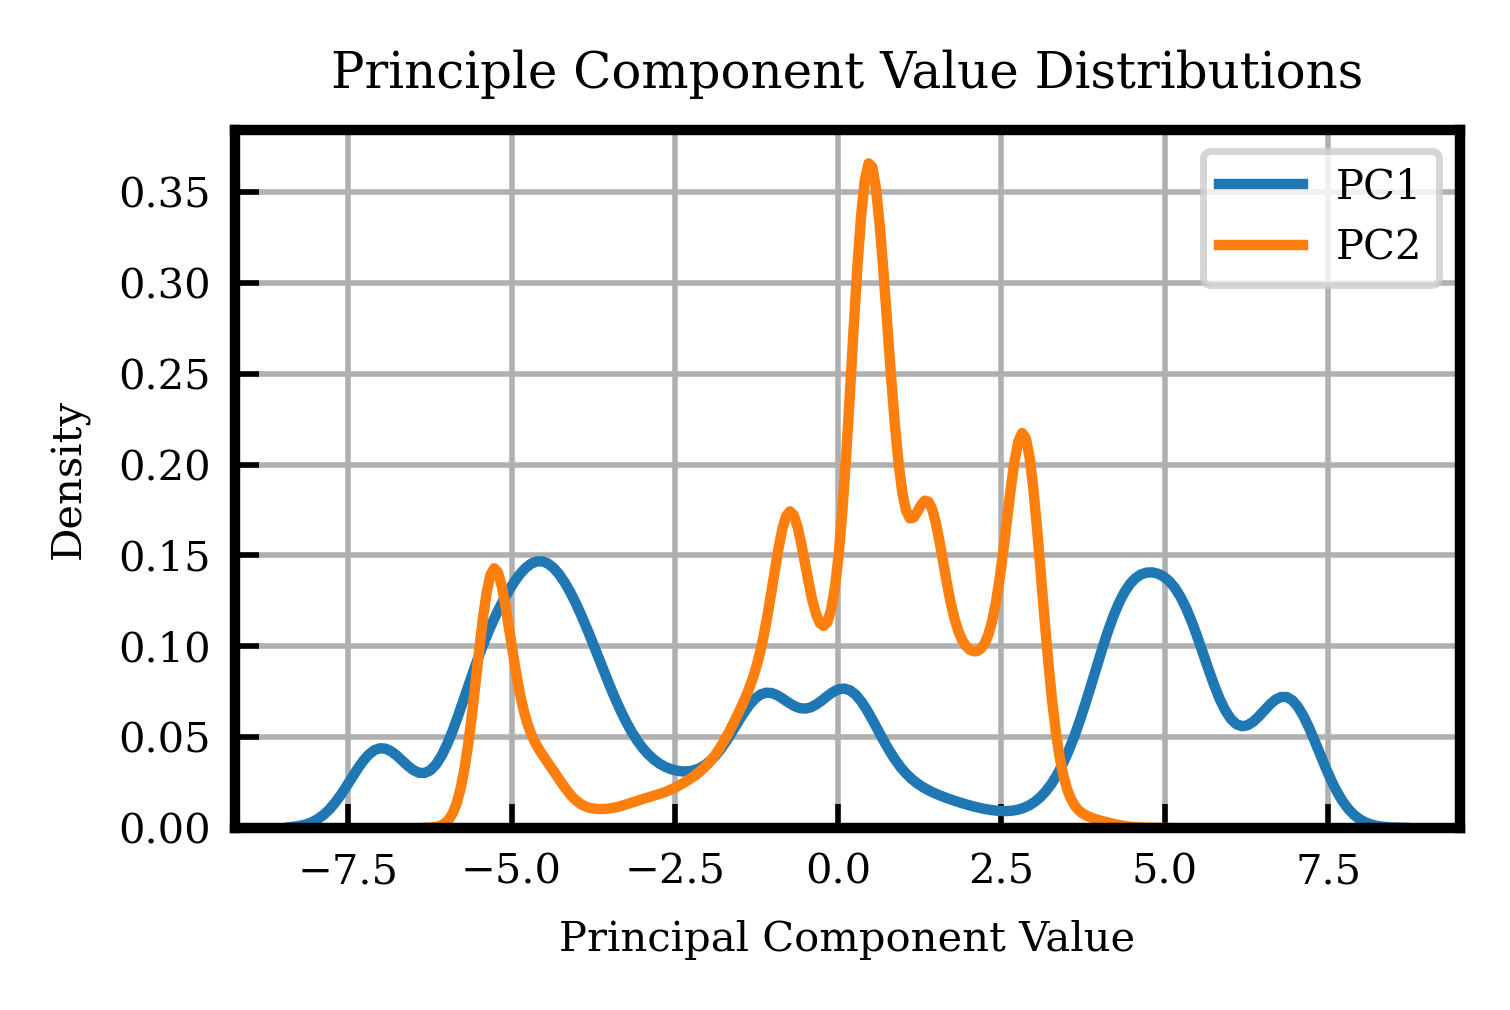

In [49]:
z1_pca  = pca_z[:,0]
z2_pca  = pca_z[:,1]

print(f'PC1 range: {z1_pca.min()}, {z1_pca.max()}')
print(f'PC2 range: {z2_pca.min()}, {z2_pca.max()}')

sns.kdeplot(z1_pca,label = 'PC1')
sns.kdeplot(z2_pca,label = 'PC2')

plt.xlabel('Principal Component Value')
plt.legend()
plt.title('Principle Component Value Distributions')
plt.grid(True)
plt.tight_layout()
plt.show()

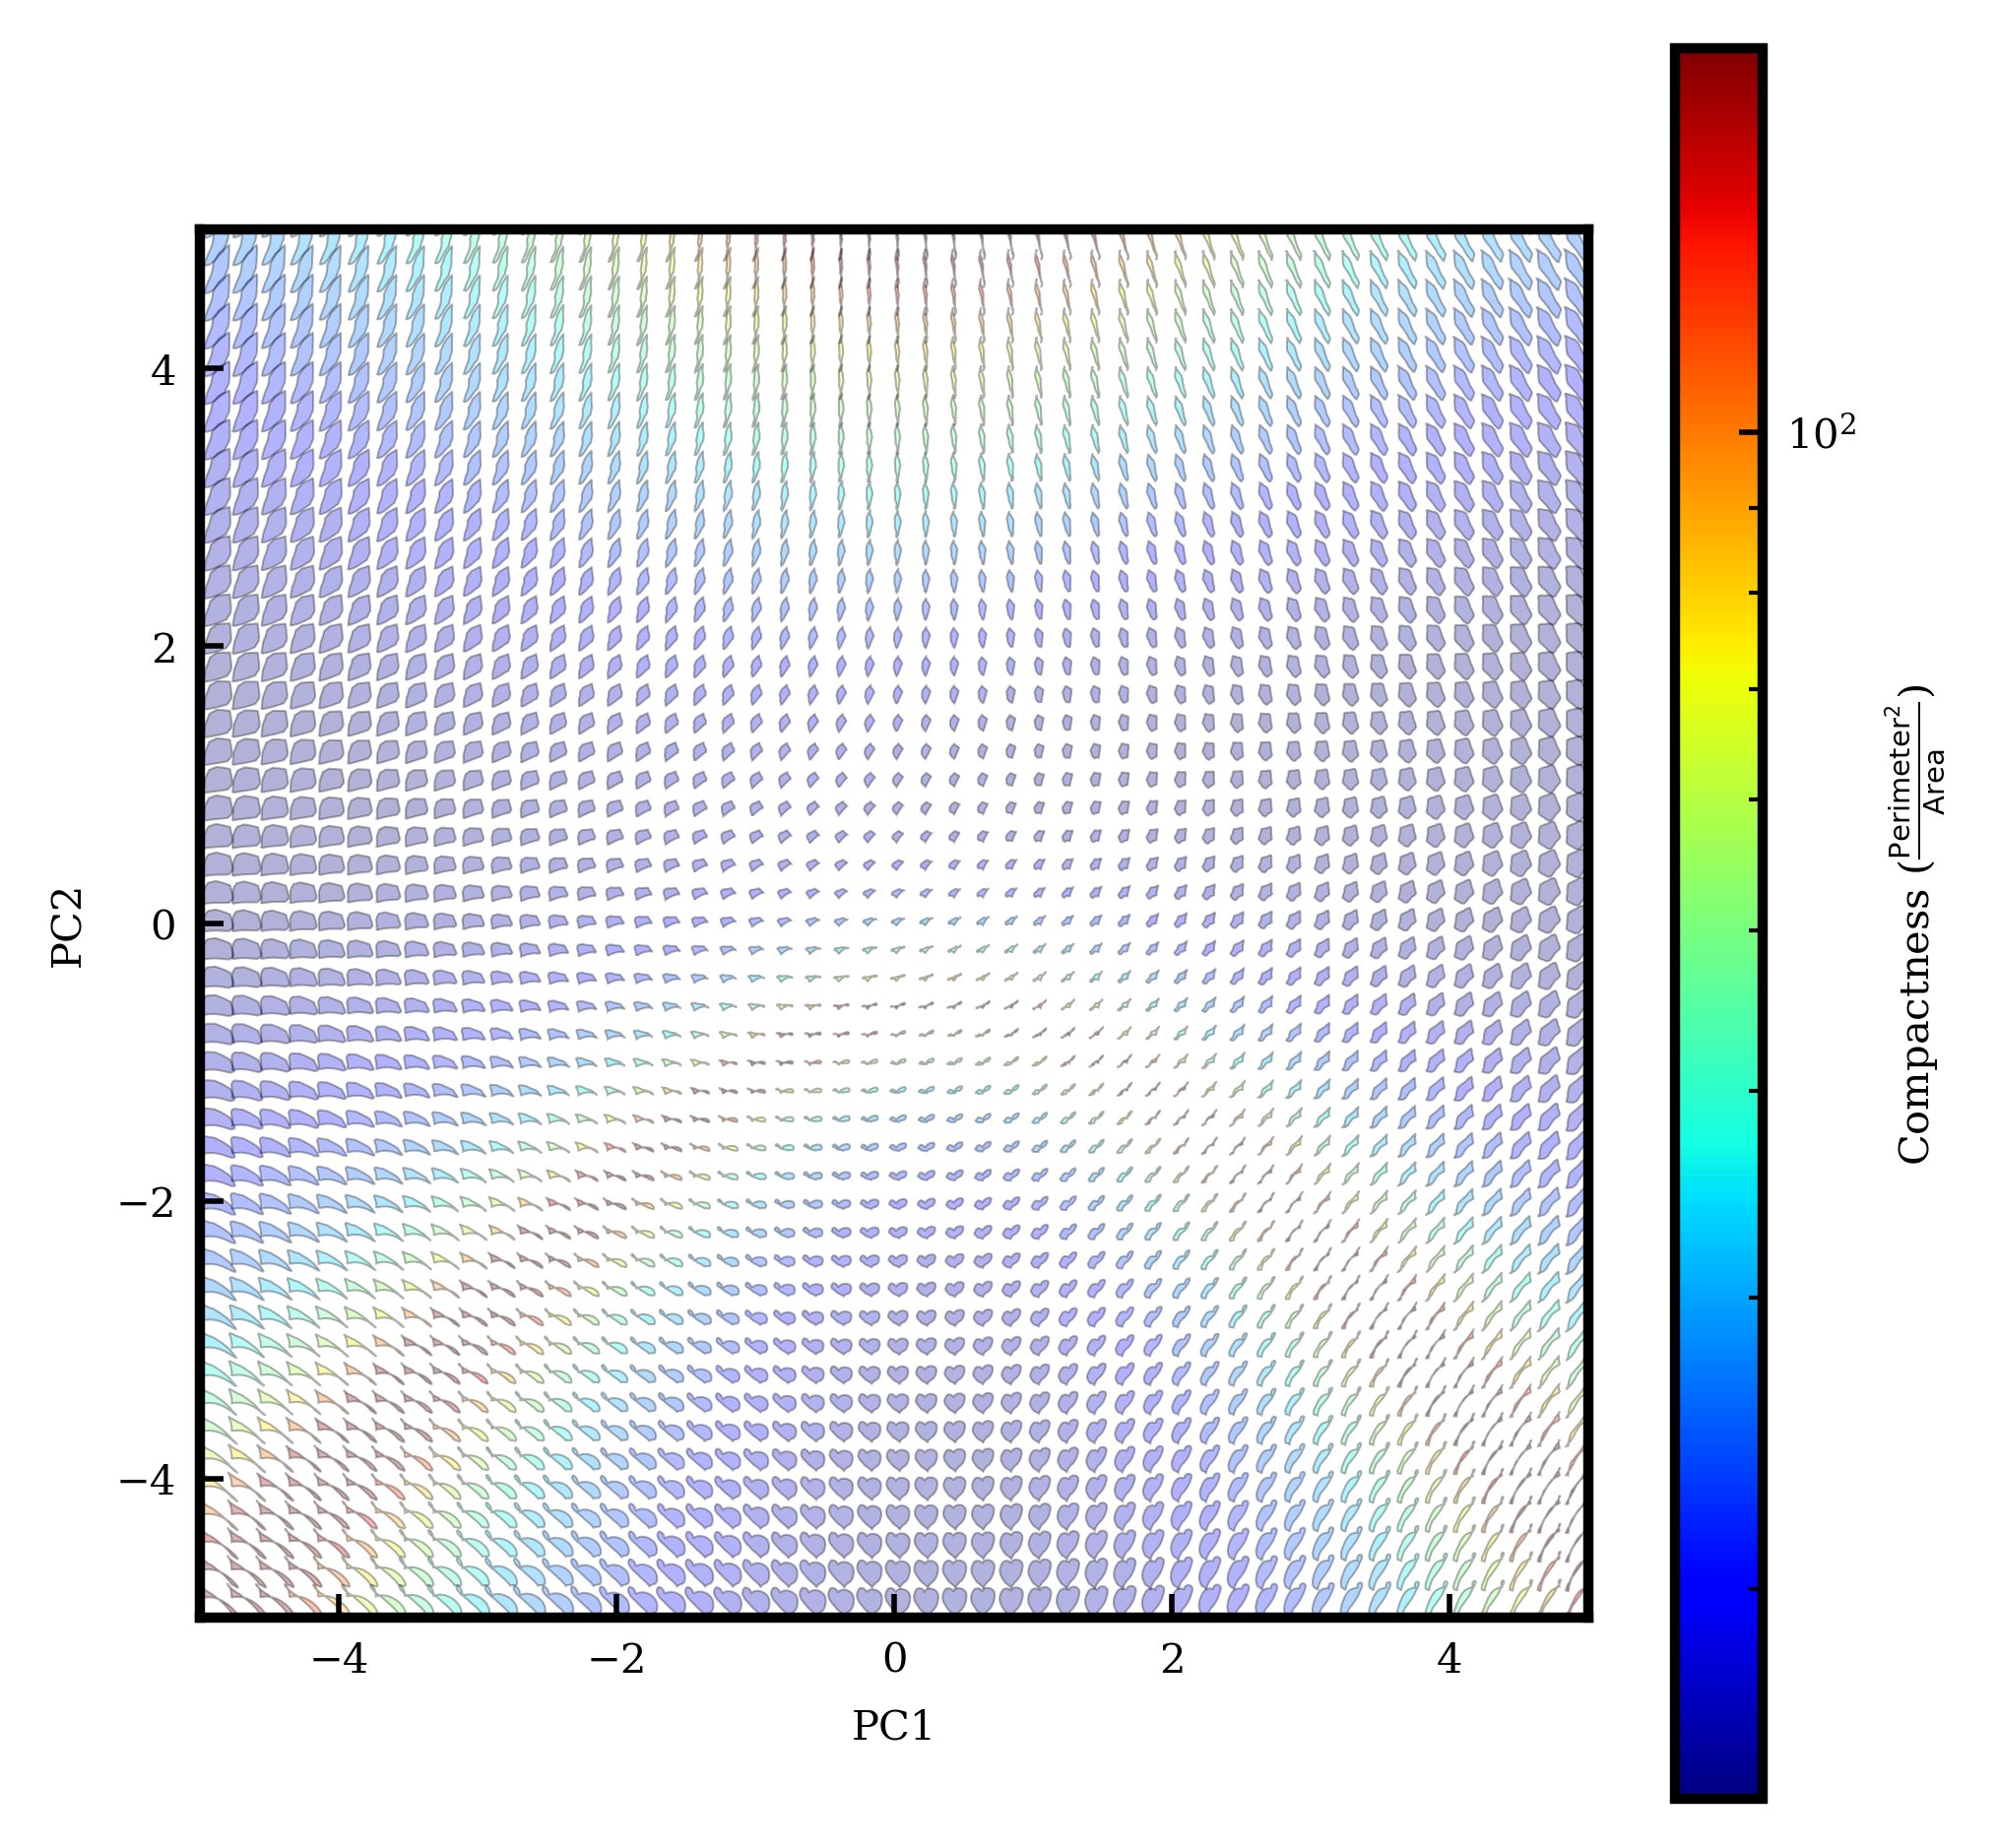

In [50]:
# latent_dim = model.latent_dim
grid_size = 50
z_min,z_max = -5.0,5.0

resolution = 200

z1 = np.linspace(z_min,z_max,grid_size)
z2 = np.linspace(z_min,z_max,grid_size)

z_grid = np.array(np.meshgrid(z1,z2)).T.reshape(-1,2)

cmap = cm.jet  

# Compute min/max compactness for color scaling
compactness_values = []
z_values = []
for z in z_grid:
    recon_ = pca.inverse_transform(z).reshape(200,2)
    compactness = vae.Metrics(recon_).compute_compactness()
    compactness_values.append(compactness)

compactness_min = np.percentile(compactness_values,5)
compactness_max = np.percentile(compactness_values,95)

# Define normalization
norm = colors.LogNorm(vmin=compactness_min, vmax=compactness_max) 

# Create figure and axis
fig, ax = plt.subplots(figsize=(4,4))
ax.set_xlim(z_min, z_max)
ax.set_ylim(z_min, z_max)
ax.set_aspect('equal')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.tight_layout()


shape_scale = 0.25
for z in z_grid:
    decoded_shape = pca.inverse_transform(z).reshape(200,2)
    
    compactness = vae.Metrics(decoded_shape).compute_compactness()
    decoded_shape *= shape_scale
    
    # Map compactness to an RGBA color tuple
    color_value = cmap(norm(compactness))  # This ensures an RGBA tuple (r, g, b, a)

    # Plot shape
    ax.fill(decoded_shape[:, 0] + z[0], decoded_shape[:, 1] + z[1],
            color=color_value, alpha=0.3, edgecolor='black',linewidth = 0.3)

# Add colorbar reflecting the full compactness range
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label(r"Compactness ($\frac{\text{Perimeter}^2}{\text{Area}}$)")

plt.show()
